In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [3]:
df=pd.read_csv("/content/DUTCHBANGL.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)    VOLUME
0  437 2018-05-08   DUTCHBANGL  119.0  ...  120.4   73.0       1.970   16562.0
1  436 2018-06-08   DUTCHBANGL  117.3  ...  118.9  119.0       3.981   33758.0
2  435 2018-07-08   DUTCHBANGL  117.6  ...  117.8  211.0       7.775   65891.0
3  434 2018-08-08   DUTCHBANGL  120.5  ...  117.6  322.0      18.579  156042.0
4  433 2018-09-08   DUTCHBANGL  122.4  ...  119.4  630.0      25.629  209254.0

[5 rows x 12 columns]

In [4]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)    VOLUME
36  401 2018-01-10   DUTCHBANGL  126.1  ...  124.2  137.0       4.130   32900.0
59  378 2018-01-11   DUTCHBANGL  132.1  ...  133.5  187.0       5.707   43076.0
37  400 2018-02-10   DUTCHBANGL  131.7  ...  125.6  707.0      25.653  199338.0
79  358 2018-02-12   DUTCHBANGL  131.6  ...  130.7  188.0       4.044   31048.0
16  421 2018-03-09   DUTCHBANGL  129.7  ...  130.2  275.0       8.772   67513.0

[5 rows x 12 columns]

In [5]:

df = df.set_index('DATE')
df.head(3)


# TRADING CODE   LTP*   HIGH  ...    YCP  TRADE  VALUE (mn)    VOLUME
DATE                                        ...                                    
2018-01-10  401   DUTCHBANGL  126.1  126.2  ...  124.2  137.0       4.130   32900.0
2018-01-11  378   DUTCHBANGL  132.1  133.6  ...  133.5  187.0       5.707   43076.0
2018-02-10  400   DUTCHBANGL  131.7  131.7  ...  125.6  707.0      25.653  199338.0

[3 rows x 11 columns]

In [6]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [7]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [8]:
df['volatility'] = df['volatility']*100

In [9]:
import matplotlib.pyplot as plt 

In [10]:
df=df.reset_index()['volatility']

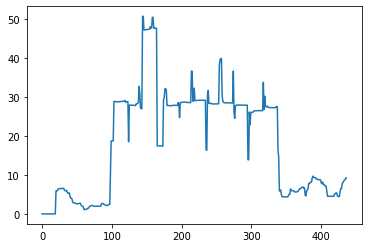

In [11]:
plt.plot(df)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [13]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:

print(X_train.shape), print(y_train.shape)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
X_test.shape

(31, 100, 1)

In [19]:

filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDutchbangla/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDutchbangla/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDutchbangla/model3.h5"

In [20]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 77ms/step - loss: 0.2099 - val_loss: 0.0049
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0671 - val_loss: 0.0165
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0380 - val_loss: 0.0035
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0255 - val_loss: 0.0081
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0216 - val_loss: 0.0184
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0191 - val_loss: 0.0283
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0138 - val_loss: 0.0348
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0129 - val_loss: 0.0398
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0111 - val_loss: 0.0390
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0105 - val_loss: 0.0444
Epoch 11/100
7/7 [=

In [21]:
model1.save(filepath1)

In [22]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 8s 391ms/step - loss: 0.2175 - val_loss: 0.0532
Epoch 2/100
7/7 [==============================] - 1s 205ms/step - loss: 0.0411 - val_loss: 0.0134
Epoch 3/100
7/7 [==============================] - 1s 193ms/step - loss: 0.0306 - val_loss: 0.0418
Epoch 4/100
7/7 [==============================] - 1s 194ms/step - loss: 0.0252 - val_loss: 0.0463
Epoch 5/100
7/7 [==============================] - 1s 162ms/step - loss: 0.0219 - val_loss: 0.0368
Epoch 6/100
7/7 [==============================] - 1s 162ms/step - loss: 0.0187 - val_loss: 0.0557
Epoch 7/100
7/7 [==============================] - 1s 162ms/step - loss: 0.0198 - val_loss: 0.0551
Epoch 8/100
7/7 [==============================] - 1s 160ms/step - loss: 0.0190 - val_loss: 0.0489
Epoch 9/100
7/7 [==============================] - 1s 155ms/step - loss: 0.0190 - val_loss: 0.0662
Epoch 10/100
7/7 [==============================] - 1s 156ms/step - loss: 0.0207 - val_loss: 0.0664
Epoch 11/

In [23]:
model2.save(filepath2)

In [24]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 15s 634ms/step - loss: 0.2213 - val_loss: 0.1235
Epoch 2/100
7/7 [==============================] - 2s 265ms/step - loss: 0.0479 - val_loss: 0.0249
Epoch 3/100
7/7 [==============================] - 2s 263ms/step - loss: 0.0297 - val_loss: 0.0615
Epoch 4/100
7/7 [==============================] - 2s 268ms/step - loss: 0.0182 - val_loss: 0.0230
Epoch 5/100
7/7 [==============================] - 2s 264ms/step - loss: 0.0183 - val_loss: 0.0368
Epoch 6/100
7/7 [==============================] - 2s 263ms/step - loss: 0.0152 - val_loss: 0.0271
Epoch 7/100
7/7 [==============================] - 2s 256ms/step - loss: 0.0114 - val_loss: 0.0296
Epoch 8/100
7/7 [==============================] - 2s 257ms/step - loss: 0.0143 - val_loss: 0.0272
Epoch 9/100
7/7 [==============================] - 2s 265ms/step - loss: 0.0145 - val_loss: 0.0340
Epoch 10/100
7/7 [==============================] - 2s 260ms/step - loss: 0.0128 - val_loss: 0.0313
Epoch 11

In [25]:
model3.save(filepath3)

In [26]:
from keras.models import load_model

In [27]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsDutchbangla/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [28]:
print(len(all_models))

3


In [29]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsDutchbangla/model1.h5'
model = load_model(f1)


In [30]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [31]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [32]:

#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

5.708397606091283

In [33]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [34]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [35]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [36]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [37]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [38]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [39]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [40]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [41]:
stacked_model = define_stacked_model(all_models)

In [42]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [43]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [44]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.10993753, 0.09876504, 0.12466076],
       [0.1088289 , 0.09021489, 0.12718523],
       [0.1095195 , 0.09148137, 0.12671289],
       [0.11262316, 0.107391  , 0.1218926 ],
       [0.11480349, 0.11220914, 0.11997726],
       [0.11644502, 0.11018863, 0.11991818],
       [0.11855115, 0.11352348, 0.11854107],
       [0.11750397, 0.1018004 , 0.12193674],
       [0.1198456 , 0.11113407, 0.11908799],
       [0.1212886 , 0.11707801, 0.11732742],
       [0.12153703, 0.11747397, 0.11726096],
       [0.12238491, 0.12193184, 0.11595339],
       [0.123863  , 0.1284703 , 0.10992274],
       [0.12548684, 0.13596846, 0.10012977],
       [0.12578139, 0.13862598, 0.09672046],
       [0.1252315 , 0.14058861, 0.09426294],
       [0.12399657, 0.14018008, 0.09496744],
       [0.12218319, 0.13837068, 0.09754097],
       [0.12039535, 0.13649201, 0.1002139 ],
       [0.12009397, 0.1378411 , 0.09859185],
       [0.11901988, 0.13541786, 0.10178921],
       [0.11736116, 0.13103545, 0.10744673],
       [0.

In [45]:
yhat=scaler.inverse_transform(yhat)

In [46]:
x, y, z = yhat.T

In [47]:
avg = (x+y+z)/3

In [48]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [49]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

1.7011489326158904

In [50]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

1.9768271773562751

In [51]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

2.115809472722208

In [52]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

1.1907015636137035